In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
fandango = pd.read_csv("./data/fandango_scrape.csv")

fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
all_sites = pd.read_csv("./data/all_sites_scores.csv")

all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


<Axes: xlabel='RATING', ylabel='VOTES'>

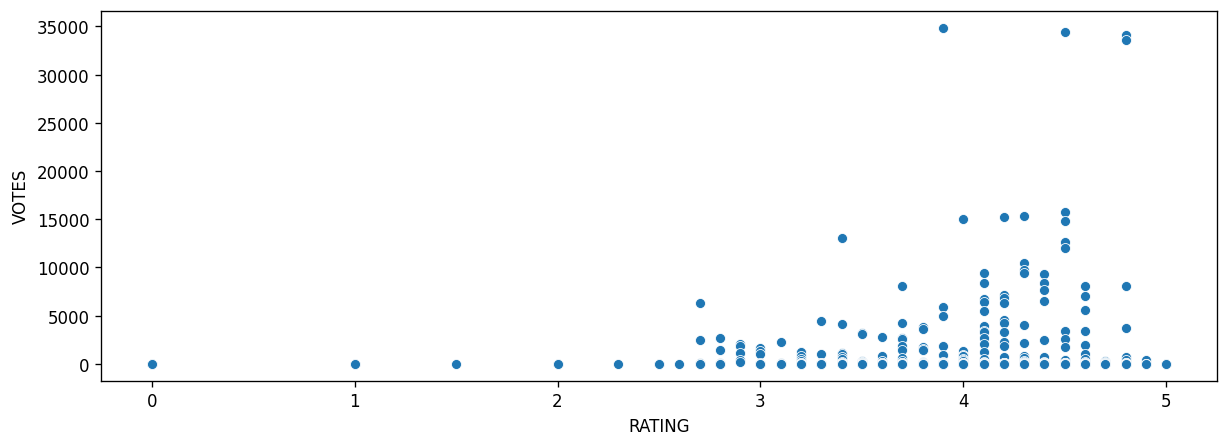

In [ ]:
# The relationship between rating and number of votes

plt.figure(figsize=(12, 4), dpi=120)
sns.scatterplot(data=fandango, x='RATING', y='VOTES')

In [ ]:
# Correlation 
fandango.loc[:, fandango.columns != 'FILM'].corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


<Axes: xlabel='YEAR', ylabel='Count'>

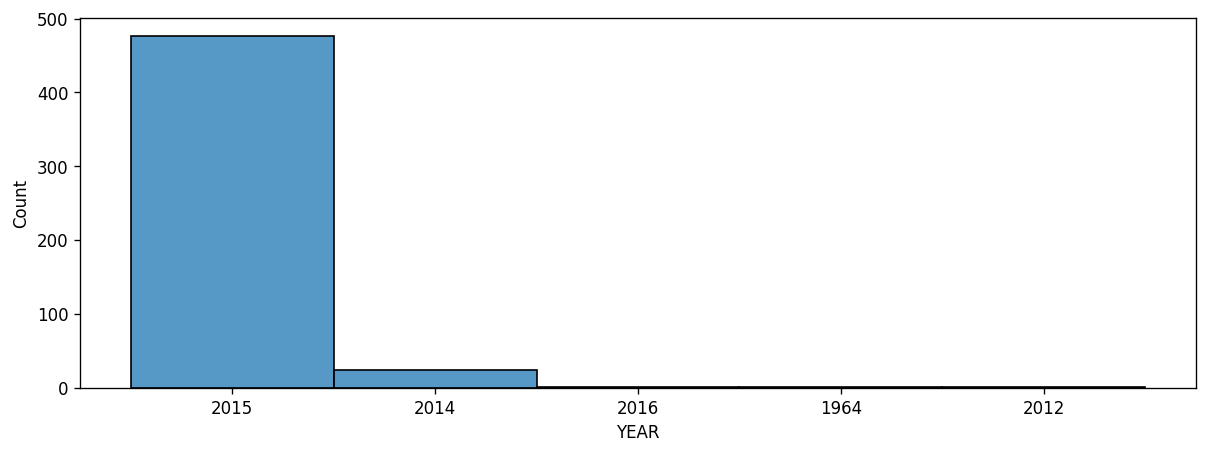

In [ ]:
# Number of films by year
fandango['YEAR'] = fandango.FILM.str.extract(r'\((\d+)\)')

plt.figure(figsize=(12, 4), dpi=120)
sns.histplot(data=fandango, x="YEAR")

<Axes: xlabel='STARS_DIFF', ylabel='Count'>

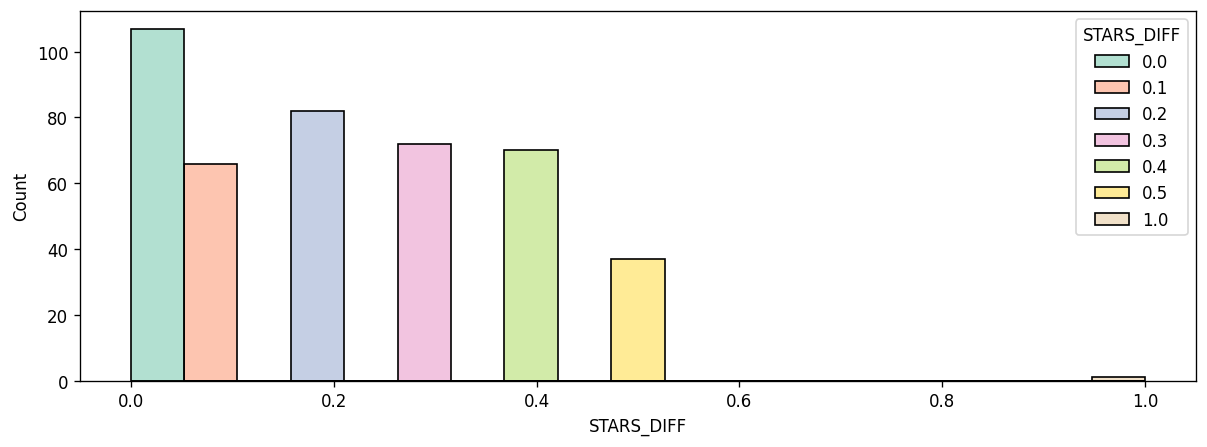

In [ ]:
# Difference between STARS and RATING

fan_review = fandango.drop(fandango[fandango['VOTES'] == 0].index)

fan_review['STARS_DIFF'] = (fan_review['STARS'] - fan_review['RATING']).round(1)

plt.figure(figsize=(12, 4), dpi=120)
sns.histplot(fan_review, x='STARS_DIFF', hue='STARS_DIFF', palette='Set2')

Text(0, 0.5, 'IMDB_user_vote_count')

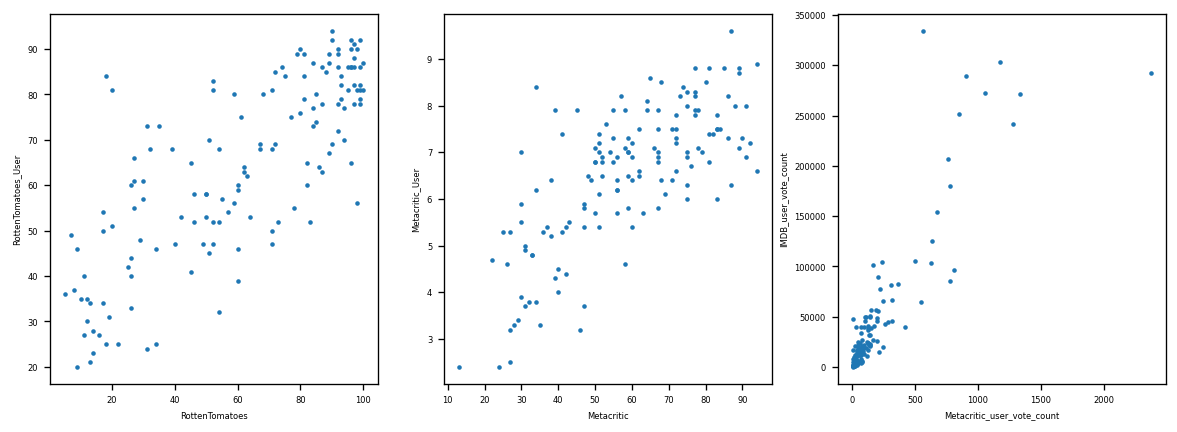

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), dpi=120)

fig.rcParams.update({'font.size': 5}) 

ax1.scatter(x=all_sites['RottenTomatoes'], y=all_sites['RottenTomatoes_User'], s=3)
ax1.set_xlabel('RottenTomatoes')
ax1.set_ylabel('RottenTomatoes_User')

ax2.scatter(x=all_sites['Metacritic'], y=all_sites['Metacritic_User'], s=3)
ax2.set_xlabel('Metacritic')
ax2.set_ylabel('Metacritic_User')

ax3.scatter(x=all_sites['Metacritic_user_vote_count'], y=all_sites['IMDB_user_vote_count'], s=3)
ax3.set_xlabel('Metacritic_user_vote_count')
ax3.set_ylabel('IMDB_user_vote_count')

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

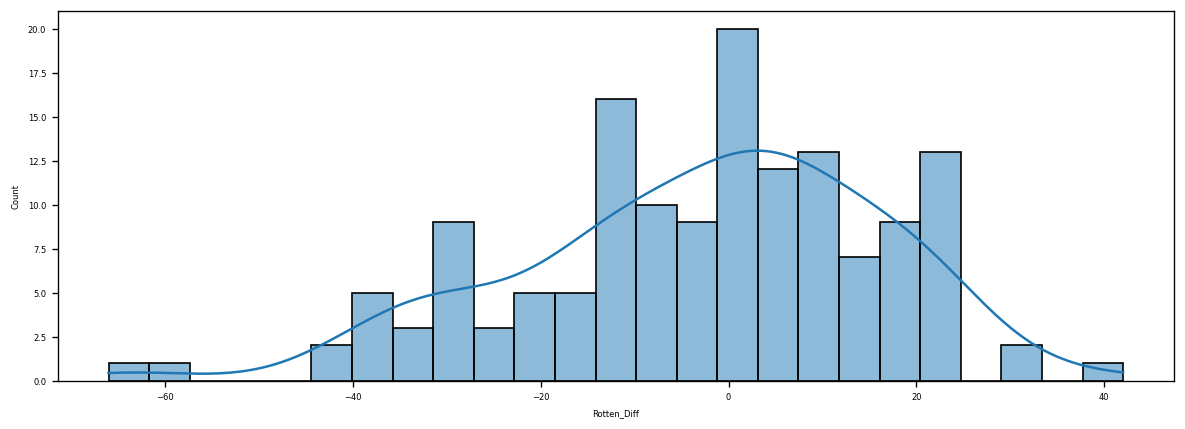

In [ ]:
# RT Critics Score minus RT User Score

all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

plt.figure(figsize=(12, 4), dpi=120)
sns.histplot(data=all_sites, x='Rotten_Diff', bins=25, kde=True)

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

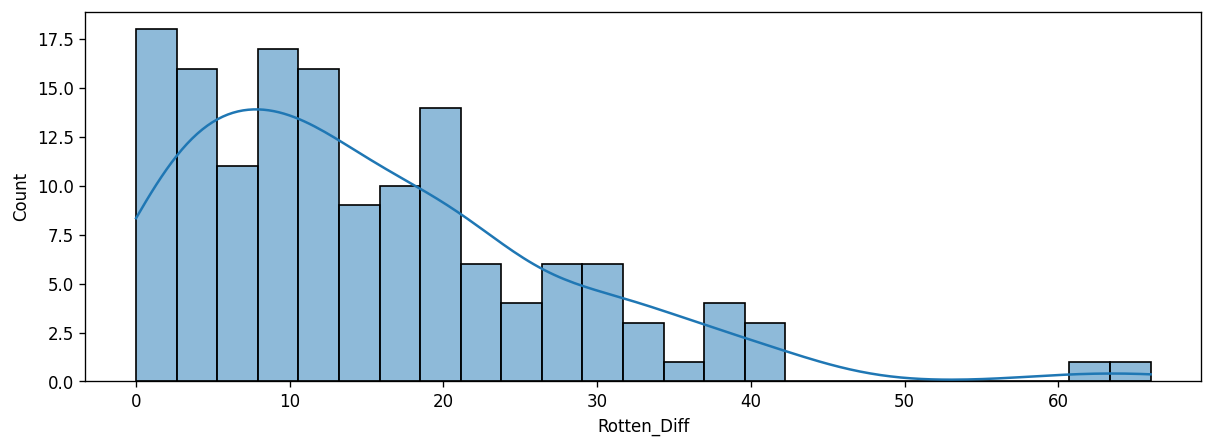

In [ ]:
# Abs Difference between RT Critics Score and RT User Score

plt.figure(figsize=(12, 4), dpi=120)
sns.histplot(all_sites['Rotten_Diff'].apply(abs), bins=25, kde=True)

In [47]:
megred_ds = pd.merge(all_sites, fandango, 'inner')

megred_ds['RT_Norm'] = all_sites['RottenTomatoes'] / 100 * 5
megred_ds['RTU_Norm'] = all_sites['RottenTomatoes_User'] / 100 * 5
megred_ds['Meta_Norm'] = all_sites['Metacritic'] / 100 * 5
megred_ds['Meta_U_Norm'] = all_sites['Metacritic_User'] / 10 * 5
megred_ds['IMDB_Norm'] = all_sites['IMDB'] / 10 * 5

In [48]:
norm_scores = megred_ds.copy()[['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]

<Axes: ylabel='Density'>

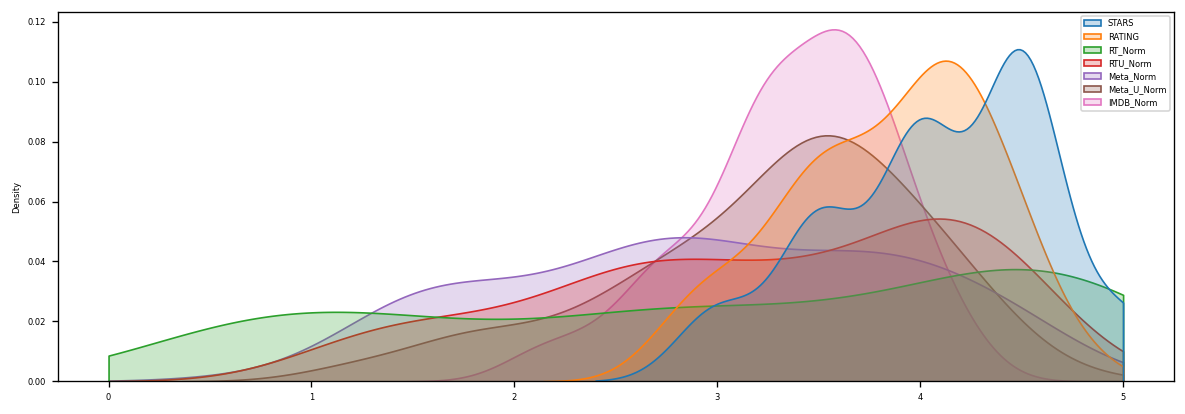

In [ ]:
# Difference between ratings of different companies

plt.figure(figsize=(12, 4), dpi=120)
sns.kdeplot(norm_scores, clip=[0, 5], fill=True)

<Axes: ylabel='Count'>

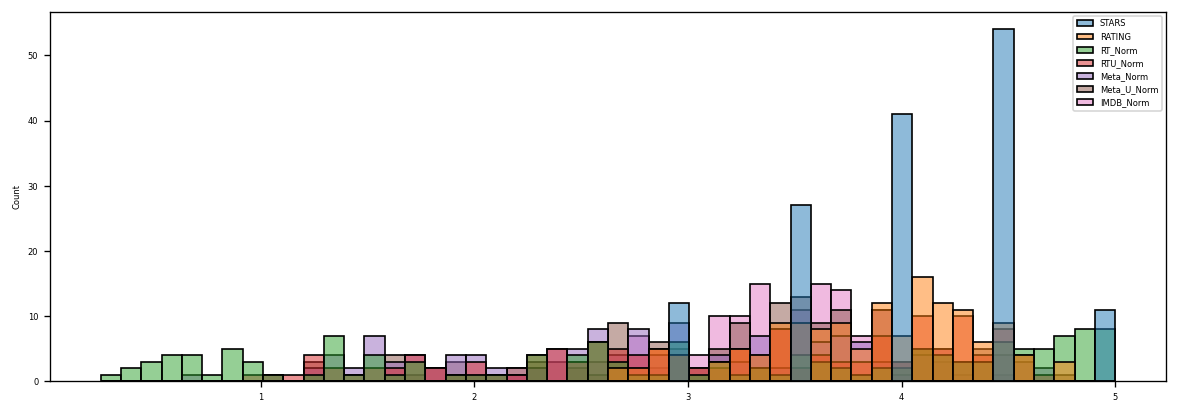

In [55]:
plt.figure(figsize=(12, 4), dpi=120)
sns.histplot(norm_scores, bins=50)

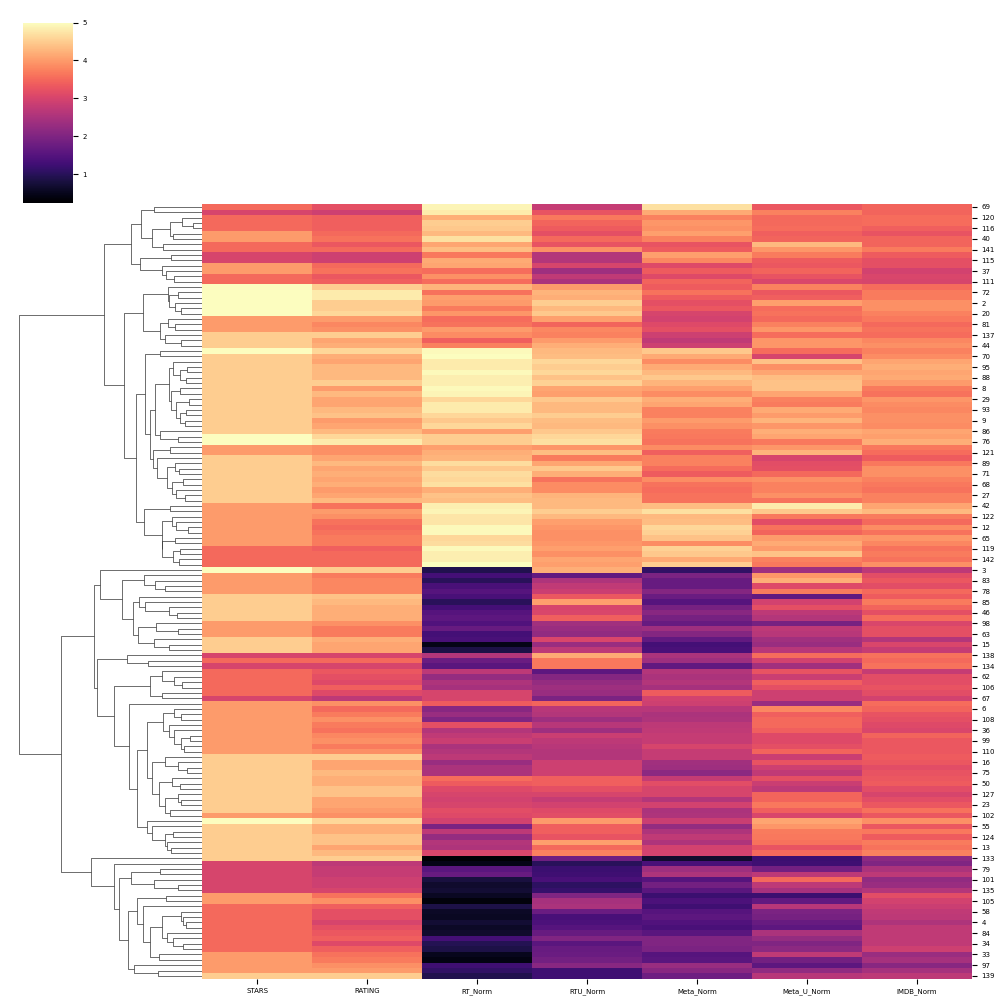

In [ ]:
# Heatmap for normalized data

sns.clustermap(norm_scores, cmap='magma', col_cluster=False)

In [57]:
megred_ds.nsmallest(10, 'RT_Norm')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,STARS,RATING,VOTES,YEAR,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
133,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42,4.5,4.5,2603,2015,0.25,1.80,0.65,1.20,2.15
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42,4.0,3.9,917,2015,0.35,2.45,1.40,1.65,2.95
53,Hot Pursuit (2015),8,37,31,3.7,4.9,78,17061,-29,4.0,3.7,2618,2015,0.40,1.85,1.55,1.85,2.45
15,Taken 3 (2015),9,46,26,4.6,6.1,240,104235,-37,4.5,4.1,6757,2015,0.45,2.30,1.30,2.30,3.05
48,Fantastic Four (2015),9,20,27,2.5,4.0,421,39838,-11,3.0,2.7,6288,2015,0.45,1.00,1.35,1.25,2.00
33,The Boy Next Door (2015),10,35,30,5.5,4.6,75,19658,-25,4.0,3.6,2800,2015,0.50,1.75,1.50,2.75,2.30
35,The Loft (2015),11,40,24,2.4,6.3,80,21319,-29,4.0,3.6,811,2015,0.55,2.00,1.20,1.20,3.15
60,Unfinished Business (2015),11,27,32,3.8,5.4,39,14346,-16,3.5,3.2,821,2015,0.55,1.35,1.60,1.90,2.70
58,Seventh Son (2015),12,35,30,3.9,5.5,126,41177,-23,3.5,3.2,1213,2015,0.60,1.75,1.50,1.95,2.75
59,Mortdecai (2015),12,30,27,3.2,5.5,144,31878,-18,3.5,3.2,1196,2015,0.60,1.50,1.35,1.60,2.75


In [58]:
megred_ds.nlargest(10, 'RT_Norm')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,STARS,RATING,VOTES,YEAR,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
70,Seymour: An Introduction (2015),100,87,83,6.0,7.7,4,243,13,4.5,4.2,41,2015,5.00,4.35,4.15,3.00,3.85
144,"Kumiko, The Treasure Hunter (2015)",87,63,68,6.4,6.7,19,5289,24,3.5,3.5,41,2015,5.00,4.05,4.50,3.65,3.90
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,62,12227,17,4.5,4.0,896,2015,4.95,4.10,4.05,4.40,3.70
12,Leviathan (2014),99,79,92,7.2,7.7,145,22521,20,4.0,3.5,64,2014,4.95,3.95,4.60,3.60,3.85
25,Selma (2014),99,86,89,7.1,7.5,316,45344,13,5.0,4.6,7025,2014,4.95,4.30,4.45,3.55,3.75
41,Timbuktu (2015),99,78,91,6.9,7.2,37,6246,21,4.0,3.6,74,2015,4.95,3.90,4.55,3.45,3.60
96,Song of the Sea (2014),99,92,86,8.2,8.2,62,14067,7,4.5,4.3,66,2014,4.95,4.60,4.30,4.10,4.10
119,Phoenix (2015),99,81,91,8.0,7.2,21,3687,18,3.5,3.4,70,2015,4.95,4.05,4.55,4.00,3.60
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42,3.5,3.2,290,2014,4.90,2.80,4.70,3.30,3.45
91,Paddington (2015),98,81,77,8.2,7.2,149,38593,17,4.5,4.3,4045,2015,4.90,4.05,3.85,4.10,3.60


<Axes: ylabel='Density'>

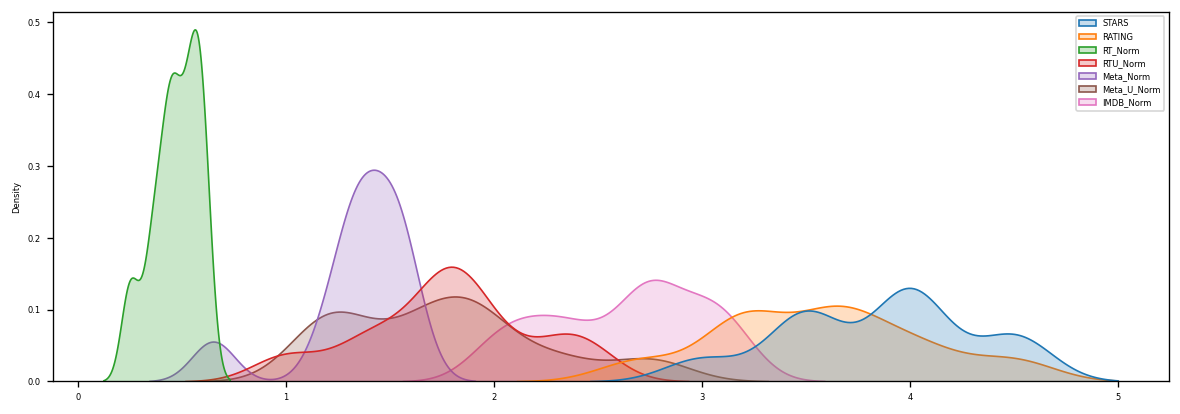

In [ ]:
# Worst films
worst_films = megred_ds.nsmallest(10, 'RT_Norm')[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

plt.figure(figsize=(12, 4), dpi=120)
sns.kdeplot(worst_films, clip=[0, 5], fill=True, bw_adjust=0.6)